In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BNB-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 40s 551ms/step - loss: 0.0238 - val_loss: 0.0029
Epoch 2/100
24/24 [==============================] - 6s 253ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 3/100
24/24 [==============================] - 6s 259ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 4/100
24/24 [==============================] - 6s 266ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 5/100
24/24 [==============================] - 7s 281ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 6/100
24/24 [==============================] - 7s 281ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 7/100
24/24 [==============================] - 7s 288ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 8/100
24/24 [==============================] - 7s 274ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/100
24/24 [==============================] - 7s 291ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 10/100
24/24 [==============================] - 7s 281ms/step - loss: 0.0020 - val_l

Epoch 77/100
24/24 [==============================] - 11s 439ms/step - loss: 4.4270e-04 - val_loss: 2.3474e-04
Epoch 78/100
24/24 [==============================] - 11s 446ms/step - loss: 4.8348e-04 - val_loss: 2.2499e-04
Epoch 79/100
24/24 [==============================] - 10s 417ms/step - loss: 4.8917e-04 - val_loss: 5.5984e-04
Epoch 80/100
24/24 [==============================] - 10s 405ms/step - loss: 4.1564e-04 - val_loss: 2.9925e-04
Epoch 81/100
24/24 [==============================] - 11s 438ms/step - loss: 4.0789e-04 - val_loss: 5.6410e-04
Epoch 82/100
24/24 [==============================] - 10s 428ms/step - loss: 5.6155e-04 - val_loss: 4.3141e-04
Epoch 83/100
24/24 [==============================] - 11s 446ms/step - loss: 4.0749e-04 - val_loss: 4.0865e-04
Epoch 84/100
24/24 [==============================] - 10s 435ms/step - loss: 4.1074e-04 - val_loss: 3.5988e-04
Epoch 85/100
24/24 [==============================] - 10s 425ms/step - loss: 3.9907e-04 - val_loss: 6.0276e-04
E

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 49ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.023
RMSE on validation set: 0.021
MAPE on test set: 0.043
MAPE on validation set: 0.041
The explained variance score (EVS) on test set: 0.761
The explained variance score (EVS) on validate set: 0.880


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.42694237 0.42326871 0.40907224 0.40925538 0.41005909 0.42743496
 0.45596829 0.45664851 0.45331725 0.48704139 0.5007178  0.48950874
 0.49759857 0.49158345 0.49512294 0.47521485 0.487006   0.4759144
 0.47637974 0.48559834 0.45898966 0.46241829 0.4632803  0.46732347
 0.46802425 0.46532065 0.46340913 0.4554494  0.45905747 0.46360871
 0.4612228  0.45861938 0.45852332 0.46184223 0.47001046 0.47650613
 0.47086292 0.47975428 0.48602235 0.49230179 0.5142748  0.502072
 0.50681758 0.47643085 0.46928492 0.4748993  0.49020707 0.48816568
 0.48909578 0.49959705 0.48846671 0.48902045 0.47908999 0.47558124
 0.49858837 0.48535539 0.47531123 0.48163036 0.47822508 0.48270933
 0.47652949 0.47480446 0.46347232 0.46131039 0.46437155 0.45416405
 0.45550983 0.45919399 0.46074999 0.462817   0.45962882 0.46363891
 0.45677594 0.45604556 0.45864975 0.45240024 0.45646288 0.4627826
 0.45154891 0.44977025 0.45296331 0.4540097  0.46391558 0.46026242
 0.46008045 0.45293421 0.45009603 0.45376055 0.4527167

7 day output [[0.43879905]]
8 day input [0.45331725 0.48704139 0.5007178  0.48950874 0.49759857 0.49158345
 0.49512294 0.47521485 0.487006   0.4759144  0.47637974 0.48559834
 0.45898966 0.46241829 0.4632803  0.46732347 0.46802425 0.46532065
 0.46340913 0.4554494  0.45905747 0.46360871 0.4612228  0.45861938
 0.45852332 0.46184223 0.47001046 0.47650613 0.47086292 0.47975428
 0.48602235 0.49230179 0.5142748  0.502072   0.50681758 0.47643085
 0.46928492 0.4748993  0.49020707 0.48816568 0.48909578 0.49959705
 0.48846671 0.48902045 0.47908999 0.47558124 0.49858837 0.48535539
 0.47531123 0.48163036 0.47822508 0.48270933 0.47652949 0.47480446
 0.46347232 0.46131039 0.46437155 0.45416405 0.45550983 0.45919399
 0.46074999 0.462817   0.45962882 0.46363891 0.45677594 0.45604556
 0.45864975 0.45240024 0.45646288 0.4627826  0.45154891 0.44977025
 0.45296331 0.4540097  0.46391558 0.46026242 0.46008045 0.45293421
 0.45009603 0.45376055 0.45271679 0.45039792 0.40846874 0.41530129
 0.3825143  0.38660382

15 day output [[0.54337597]]
16 day input [0.487006   0.4759144  0.47637974 0.48559834 0.45898966 0.46241829
 0.4632803  0.46732347 0.46802425 0.46532065 0.46340913 0.4554494
 0.45905747 0.46360871 0.4612228  0.45861938 0.45852332 0.46184223
 0.47001046 0.47650613 0.47086292 0.47975428 0.48602235 0.49230179
 0.5142748  0.502072   0.50681758 0.47643085 0.46928492 0.4748993
 0.49020707 0.48816568 0.48909578 0.49959705 0.48846671 0.48902045
 0.47908999 0.47558124 0.49858837 0.48535539 0.47531123 0.48163036
 0.47822508 0.48270933 0.47652949 0.47480446 0.46347232 0.46131039
 0.46437155 0.45416405 0.45550983 0.45919399 0.46074999 0.462817
 0.45962882 0.46363891 0.45677594 0.45604556 0.45864975 0.45240024
 0.45646288 0.4627826  0.45154891 0.44977025 0.45296331 0.4540097
 0.46391558 0.46026242 0.46008045 0.45293421 0.45009603 0.45376055
 0.45271679 0.45039792 0.40846874 0.41530129 0.3825143  0.38660382
 0.38447914 0.35239985 0.3469854  0.34047764 0.35952183 0.35015293
 0.36815348 0.37691662 0.

23 day output [[0.6646045]]
24 day input [0.46802425 0.46532065 0.46340913 0.4554494  0.45905747 0.46360871
 0.4612228  0.45861938 0.45852332 0.46184223 0.47001046 0.47650613
 0.47086292 0.47975428 0.48602235 0.49230179 0.5142748  0.502072
 0.50681758 0.47643085 0.46928492 0.4748993  0.49020707 0.48816568
 0.48909578 0.49959705 0.48846671 0.48902045 0.47908999 0.47558124
 0.49858837 0.48535539 0.47531123 0.48163036 0.47822508 0.48270933
 0.47652949 0.47480446 0.46347232 0.46131039 0.46437155 0.45416405
 0.45550983 0.45919399 0.46074999 0.462817   0.45962882 0.46363891
 0.45677594 0.45604556 0.45864975 0.45240024 0.45646288 0.4627826
 0.45154891 0.44977025 0.45296331 0.4540097  0.46391558 0.46026242
 0.46008045 0.45293421 0.45009603 0.45376055 0.45271679 0.45039792
 0.40846874 0.41530129 0.3825143  0.38660382 0.38447914 0.35239985
 0.3469854  0.34047764 0.35952183 0.35015293 0.36815348 0.37691662
 0.38714328 0.39732009 0.40734994 0.41745633 0.42788094 0.43879905
 0.45029706 0.46237949 0

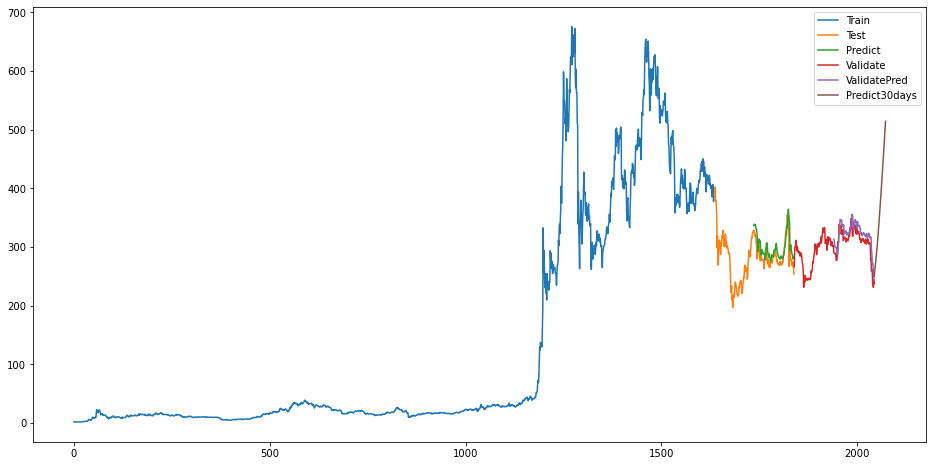

In [14]:
# 14.Vẽ hình
plt.subplots(figsize=(16, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()